<a href="https://colab.research.google.com/github/EllaThomasson/labs-ds3001/blob/main/WebScrapingLab_EllaThomasson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1

In [38]:
# I am choosing to look at the appts/housing options on craigslist

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import requests # Page requests

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://charlottesville.craigslist.org/search/apa#search=1~gallery~0~0'
raw = requests.get(url,headers=header)


Question 2

In [39]:
from bs4 import BeautifulSoup as soup # HTML parser
bsObj = soup(raw.content,'html.parser') # Parse the html
listings = bsObj.find_all(class_="cl-static-search-result") # Find all listings

In [51]:
import re  # Regular expressions
import numpy as np  # Ensure you have numpy imported
from bs4 import BeautifulSoup  # Ensure you have BeautifulSoup imported

types = ['camper', 'apartment', 'cottage', 'townhouse', 'ranch', 'house', 'home', 'dog']

data = []  # We'll save our listings in this object
for k in range(len(listings)):
    # Get the title and convert it to lowercase
    title = listings[k].find('div', class_='title').get_text(strip=True).lower() if listings[k].find('div', class_='title') else 'missing'
    price = listings[k].find('div', class_='price').get_text(strip=True) if listings[k].find('div', class_='price') else 'missing'

    # Correctly find the details div first, then the location
    details = listings[k].find('div', class_='details')
    location = details.find('div', class_='location').get_text(strip=True) if details and details.find('div', class_='location') else 'missing'

    link = listings[k].find('a')['href'] if listings[k].find('a') else 'missing'

    # Get types from the title string:
    words = title.split()
    hits = [word for word in words if word in types]  # Find types in the title
    types_found = hits[0] if hits else 'missing'

    # Append the current listing's data to the list, without the year
    data.append({'title': title, 'price': price, 'location': location, 'link': link, 'types': types_found})



Question 3

In [52]:
df = pd.DataFrame.from_dict(data)
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
display(df)

,title,price,location,link,types
0,apartment,900,Woolen Mills Charlottesville,https://charlottesville.craigslist.org/apa/d/c...,apartment
1,looking for a place to stay while looking for ...,1995,Barboursville,https://charlottesville.craigslist.org/apa/d/b...,missing
2,extended stay cottage at montfair resort farm,1950,Crozet,https://charlottesville.craigslist.org/apa/d/c...,cottage
3,"available oct 1 , being repainted now. 2 bedrooms",1250,FREE UNION,https://charlottesville.craigslist.org/apa/d/f...,missing
4,camper spot waynesboro,1,Waynesboro,https://charlottesville.craigslist.org/apa/d/w...,camper
...,...,...,...,...,...
97,all in. a great place to stay while you're loo...,1995,Barboursville,https://charlottesville.craigslist.org/apa/d/b...,missing
98,attention--->luxury stonefield 2 br-all inclusive,2350,missing,https://charlottesville.craigslist.org/apa/d/c...,missing
99,mountain views,1125,"Standardsville, Va",https://charlottesville.craigslist.org/apa/d/r...,missing
100,609 e. market st.#301 fully furnished luxury s...,2500,Downtown Charlottesville,https://charlottesville.craigslist.org/apa/d/c...,missing


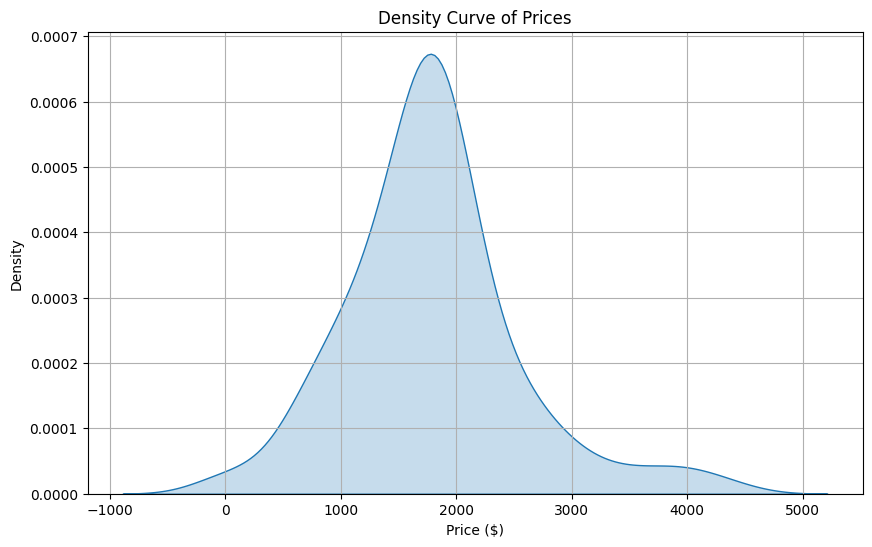

In [53]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['price'].dropna(), fill=True)
plt.title('Density Curve of Prices')
plt.xlabel('Price ($)')
plt.ylabel('Density')
plt.grid()
plt.show()

Question 4